1. What are the advantages of a CNN over a fully connected DNN for image classification?
    - CNN use far less parameters when the dataset are big (a node only connected to relative node in previous layer) -> faster to train, less overfitting, requires less training data
    - A trained kernel of CNN can detect its learned feature anywhere in the image, not like DNN is fixed to thew spot -> generalize better
    - DNN has no prior knowledge of how pixels are organized (eg: it doesn't know pixel\[0\]'s next to pixel\[1\] (CNN does know). -> lower layer of CNN can detect feature in small areas of images, higher layers can combine those to bigger features -> work well with most images.

2. Consider a CNN composed of three convolutional layers, each with 3 × 3 kernels, a stride of 2, and "same" padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200 × 300 pixels.

    What is the total number of parameters in the CNN? If we are using 32-bit floats, at least how much RAM will this network require when making a prediction for a single instance? What about when training on a mini-batch of 50 images?

    - Num params of first layer: 28 x 99
        - Feature map size: 100 x 150
            - $\frac{(width - kernel\_size) + 2*padding}{stride}+ 1 * \frac{(height - kernel\_size) + 2*padding}{stride}+1$
            - $\Leftrightarrow \frac{(200 - 2) + 2*0}{2} + 1 * \Leftrightarrow \frac{(300 - 2) + 2*0}{2} + 1$
            - 100 x 150
        - Weights: 3 * 3 * 3 * 100 = 2700 
        - Bias: 100
        - Total: 2800
    - Num params of 2nd layer:
        - Weights: 3 * 3 * 100 * 200 = 180000
        - Bias: 200
        - Total: 180200
    - Num params of 3rd layer:
        - Weights: 3 * 3 * 200 * 400 = 720000
        - Bias: 400
        - Total: 720400
    - Total params for CNN: 903,400

3. If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?
    - Reduce mini-batch size
    - Reduce dimensionality using a stride
    - Remove layers
    - Use 16-bit floats
    - Distribute the CNN across multiple devices

4. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?
    - Reduce computational load, memory usage, # of params -> limit the risk of overfitting    

5. When would you want to add a local response normalization layer?
    - When we need to improve generalization, since **local response normalization layer** encourages different feature maps to specialize, exploring a wider range of features.

6. Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main innovations in GoogLeNet, ResNet, SENet, and Xception?
    - AlexNet vs LeNet-5:
        - The network is larger and deeper
        - Stacking convolutional layers on top of each other (instead of Conv-Pool-Conv-Pool)
        - Local response normalization
    - GoogleNet:
        - Deeper than AlexNet
        - Inception modules (use params much more effciently: 1/10 params of AlexNet)
        
        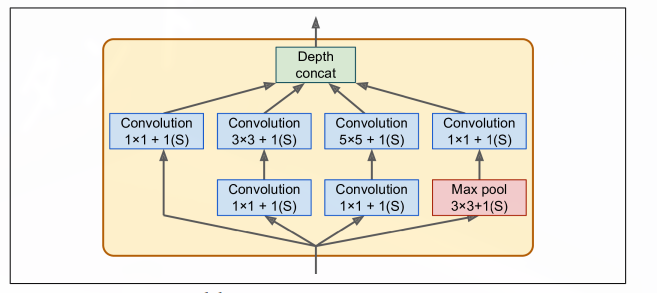
        - Using 1x1 kernels:
            - Capture patterns along the depth dimension
            - Output fewer feature maps -> bottleneck layer -> Reduce dimensionality, computational cost, speed up training, improving generalization
            - Pairs of conv layer (\[1x1,3x3\],..) acts like a more powerful conv layer, capturing more complex patterns.
        - Global average pooling layer:
            - Dimensionality reduction -> dont have many fully connected layers
            - Reduce # params
            - Limit the risk of overfitting
    - ResNet:
        - Even deeper and deeper with fewer params
        - Skip connections (shortcut connections): signal feeding into a layer is also added to the output of the layer located higher up. -> **Residual learning**
        
        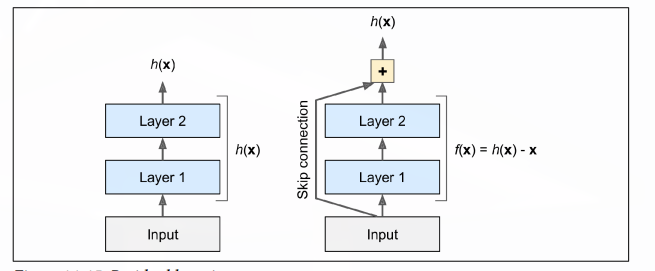
    - Xception:
        - Merge GoogleNet and ResNet, replace inception modules with **depthwise separable convolutional layer**:
        - Look at spatial patterns and depthwise patterns separately
    - SENet:
        - Extends existing architectures with SE block
        - Add SE block to every unit in the original architecture
        
        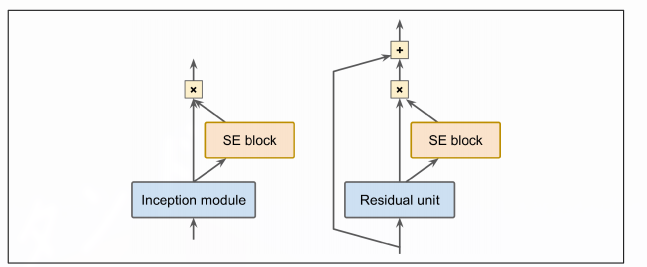
        - SEblock:
            - Analyze the output of the unit it attached to
            - Focus exclusively on the depth dimension
            - Learn which features are most active together then **recalibrate** the feature maps
        
        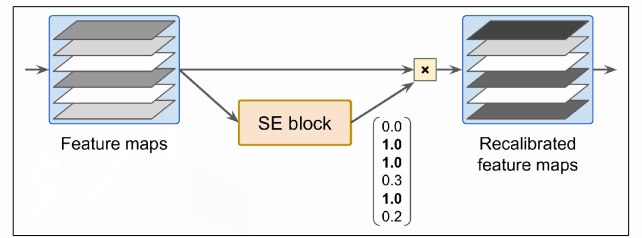

7. What is a fully convolutional network? How can you convert a dense layer into a convolutional layer?
    - What:
        - FCNs are neural networks composed of convolutional and pooling layers
        - FCNs can efficiently process images of any width and height (above minimum size)
        - Useful for object detection and semantic segmentation (look at the image once)
    - How to convert:
        - Replace the lowest dense layer with a conv layer with a kernel size equal to the layer's input size, with:
            - One filter per neuron in the dense layer, using "valid" padding
            - Stride should be 1 (can be higher)
            - Activation should be same as dense layer's.
        - Others dense layers can be converted the same way with 1x1 filters

8. What is the main technical difficulty of semantic segmentation?
    - A lot of spatial informations get lost in CNN each layer after layer (most destructive in pooling layers, or layers with stride > 1)
    - These informations needs to be restored somehow to accurately predict the class of the pixels